# Exploratory Data Analysis: Natural Language Processing of Disaster Tweets (Is It Real or Unreal)

In [1]:
# Installations
# !pip install Unidecode

In [2]:
# Dependencies
import chardet
import nltk
import numpy as np
import pandas as pd
import re
import seaborn as sns
import string
import matplotlib.pyplot as plt

from nltk.tokenize import regexp_tokenize
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize.casual import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from unidecode import unidecode

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Sharon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sharon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Check encoding because I am seeing some text that looks like it has been corrupted
# Read the first few thousand bytes to detect encoding
with open("../Data/train.csv", "rb") as f:
    raw_data = f.read(100000)  # Read first 100KB
    result = chardet.detect(raw_data)
    detected_encoding = result['encoding']

print(f"Detected Encoding: {detected_encoding}")


Detected Encoding: utf-8


In [4]:
# Read in data and set the index column
file_path = "../Data/train.csv"
df = pd.read_csv(file_path, encoding=detected_encoding, index_col=0)
df = df.reset_index(drop=True)
df

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
# Dictionary to store occurrences of corrupted characters
corrupted_counts = Counter()

# Function to detect and count non-ASCII (potentially corrupted) characters
def find_corrupted_chars(text):
    if isinstance(text, str):
        for char in re.findall(r"[^\x00-\x7F]", text):  # Find all non-ASCII characters
            corrupted_counts[char] += 1  # Increment count

# Loop through 'text' column and count occurrences of each corrupted character
df['text'].apply(find_corrupted_chars)

# Display the corrupted counts dictionary
print(corrupted_counts)

Counter({'\x89': 797, 'Û': 794, 'ª': 191, 'å': 96, 'Ï': 69, 'Ê': 66, '÷': 49, 'Ò': 45, '\x9d': 44, 'Ó': 33, 'Ì': 27, '¢': 10, '©': 10, '£': 6, '¨': 6, 'È': 5, '¼': 5, 'Ñ': 3, '¤': 3, '¡': 3, 'ã': 2, 'ü': 2, 'Ç': 2, '«': 2, '´': 1, 'â': 1, 'Â': 1, '¬': 1})


In [6]:
# Function to check if text contains non-ASCII characters
def contains_non_ascii(text):
    return bool(re.search(r'[^\x00-\x7F]', str(text)))  # Returns True if any non-ASCII character exists

# Filter rows that contain corrupted characters in any text column
df_corrupted = df[df.select_dtypes(include=['object']).applymap(contains_non_ascii).any(axis=1)]

df_corrupted


C:\Users\Sharon\AppData\Local\Temp\ipykernel_33648\2508887235.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_corrupted = df[df.select_dtypes(include=['object']).applymap(contains_non_ascii).any(axis=1)]


,keyword,location,text,target
38,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1
52,ablaze,Barbados,SANTA CRUZ ÛÓ Head of the St Elizabeth Police...,0
53,ablaze,Anaheim,Police: Arsonist Deliberately Set Black Church...,1
57,ablaze,"Sao Paulo, Brazil",Set our hearts ablaze and every city was a gif...,0
71,accident,"St. Louis, MO",#stlouis #caraccidentlawyer Speeding Among Top...,0
...,...,...,...,...
7532,wreckage,iTunes,#science Now that a piece of wreckage from fli...,1
7549,wrecked,NaN,Cramer: IgerÛªs 3 words that wrecked DisneyÛ...,0
7584,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7586,NaN,NaN,#Sismo DETECTADO #JapÌ_n 15:41:07 Seismic inte...,1


In [7]:
df.loc[57].text

'Set our hearts ablaze and every city was a gift And every skyline was like a kiss upon the lips @\x89Û_ https://t.co/cYoMPZ1A0Z'

In [8]:
# Filter DataFrame to rows containing the corrupted sequence "ÛÒ"
filtered_df = df[df['text'].str.contains("ÛÒ", na=False)]
filtered_df

,keyword,location,text,target
38,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1
128,aftershock,304,'Remembering that you are going to die is the ...,0
133,aftershock,304,People who say it cannot be done should not in...,0
160,airplane%20accident,Thrissur,Horrible Accident Man Died In Wings Of ÛÏAirp...,1
342,armageddon,NaN,Paul Craig Roberts ÛÒ Vladimir Putin Issues M...,1
696,blazing,worldwide,Why Some Traffic Is Freezing Cold And Some Bla...,0
947,blown%20up,"Grimsby, England",My dogÛªs just blown his kennel up ÛÒ Bloody...,0
1480,catastrophe,"Denver, CO",#Denver CO #Insurance #Job: Claims Property Fi...,0
1528,chemical%20emergency,"Littleton, CO, USA",THE CHEMICAL BROTHERS to play The Armory in SF...,0
1534,chemical%20emergency,NaN,THE CHEMICAL BROTHERS to play The Armory in SF...,0


In [9]:
# Define the replacement dictionary
corrections = {
    "ÛÒ": "-",  # Em Dash
    "\x89ÛÓ": "-",  # Em Dash
    "@\x89Û_": "@_",  # Correcting @ mentions
    "\x89Û_": "_",  # General underscore correction
    "ã¢": "TM",  # Trademark symbol
    "\x89ÛÏ": '"',  # Left Double Quote
    "\x89Û\x9d": '"',  # Right Double Quote
    "\x89Ûª": "'", # Apostrophe
    "åÊ": " ",
    "\x89Û÷": "'",
    "å£": "£",
    "# ": "#",     # remove spaces behind # signs
    "å¤}": "",   # Missing currency symbol
    "å_?": "",   # Missing currency symbol
    "åÇ": "...",  # Elipses
    "åÈ": ".",   # Period
    "ÌÑ1": "#1",   # Numeric ranking or ordinal indicator
    "ÌÑ": "x",   # Incorrect encoding of multiplication sign or resolution separator (800 × 582)
    "Ìü": "",   # Likely an extra misencoded character, should be removed
    "Ì´": "'",   # Misencoded apostrophe or accent mark
    "\n\n": " ",
    "Ì©": "e",   # Misencoded accented character (Réunion)
    "Ì¼": "u",   # Misencoded "ü" in "música"
    "\x89Û¢": '"',   # Misencoded double quotes
    "å¡": "!",       # Misencoded exclamation mark
    "&amp;": " ",
    "å«": "'",   # Misencoded apostrophe (don’t → don't)
    "\x89âÂ": "",   # Corrupted text, likely from encoding errors—should be removed
    "å¨": "",   # Misencoded character, likely an extra artifact—should be removed
    "å¬": "",   # Misencoded character, likely an extra artifact—should be removed
    "Ì¤": "c",   # Misencoded "ç" (Suruç, a town in Turkey)
    "Ì_n": "an",   # Misencoded "ón" (Japón, Spanish for Japan)
    "Ì_": "i",     # Misencoded "í" (likely in words like "vídeo")
    "Nå¼": "number",   # Misencoded "Nº" (Number symbol, often in rankings)
    "å_": "",      # Extra misencoded artifact—should be removed
    "é": "e",
    "ón": "an",
    "ç": "c",
    'í': "i",
    "Ì¢": "",
    "\n": "",
    "å©": " @",
    "º": "o",
}
# Apply all replacements in Pandas
for bad, good in corrections.items():
    df['text'] = df['text'].str.replace(bad, good, regex=False)
    df['location'] = df['location'].str.replace(bad, good, regex=False)

In [10]:
# Filter DataFrame to show rows containing any of the corrupted sequences
pattern = "|".join(map(re.escape, corrections.keys()))
new_filtered_df = df[df['text'].str.contains(pattern, na=False, regex=True) |
                     df['location'].str.contains(pattern, na=False, regex=True)]



In [11]:
# Dictionary to store occurrences of corrupted characters
corrupted_counts = Counter()

# Loop through 'text' column and count occurrences of each corrupted character
df['text'].apply(find_corrupted_chars)

# Display the corrupted counts dictionary
print(corrupted_counts)

Counter({'£': 6})


In [12]:
df_corrupted = df[df['text'].apply(contains_non_ascii)]

df_corrupted.text

956     #handbags Genuine Mulberry Antony Cross Body M...
1984    Unions say they are supportive of 'London' yet...
2389    Buyout Giants Bid To Derail £6bn Worldpay IPO ...
2558    Get £150 free bets when you register at Boyles...
6995    @ellenfromnowon 7-speed nexus shifter £9! (For...
7221    Incredulous at continued outcry of welfare bei...
Name: text, dtype: object

In [13]:
df['non_ascii_count'] = df['text'].apply(lambda x: sum(1 for c in str(x) if ord(c) > 127))
most_corrupted_row = df.loc[df['non_ascii_count'].idxmax()]

most_corrupted_row

keyword                                                   body%20bag
location                                                         NaN
text               #handbags Genuine Mulberry Antony Cross Body M...
target                                                             0
non_ascii_count                                                    1
Name: 956, dtype: object

In [14]:
# # # Filter DataFrame to rows containing the corrupted sequence "ÛÒ"
filtered_df = df[df['text'].str.contains('#', na=False)]
filtered_df.head(10)

,keyword,location,text,target,non_ascii_count
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0
5,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,0
6,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,0
11,NaN,NaN,Haha South Tampa is getting flooded hah- WAIT ...,1,0
12,NaN,NaN,#raining #flooding #Florida #TampaBay #Tampa 1...,1,0
13,NaN,NaN,#Flood in Bago Myanmar #We arrived Bago,1,0
14,NaN,NaN,Damage to school bus on 80 in multi car crash ...,1,0
32,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,0


In [15]:
df.loc[7480].text

'Ranking #artectura #pop2015 #number36 Florence + The Machine - Ship To Wreck https://t.co/9LE0B19lVF  #music #playlist #YouTube'

In [16]:
# Function to check for emojis in a string
def contains_emoji(text):
    emoji_pattern = re.compile("["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & pictographs
        "\U0001F680-\U0001F6FF"  # Transport & map symbols
        "\U0001F700-\U0001F77F"  # Alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric symbols
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)

    return bool(emoji_pattern.search(str(text)))

# Check if any column contains emojis
df_with_emoji = df[df.applymap(contains_emoji).any(axis=1)]
print(f"Rows containing emojis: {len(df_with_emoji)}")

# Show the first few rows with emojis
df_with_emoji.head()

Rows containing emojis: 0


C:\Users\Sharon\AppData\Local\Temp\ipykernel_33648\1869412078.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_with_emoji = df[df.applymap(contains_emoji).any(axis=1)]


,keyword,location,text,target,non_ascii_count


This is wrong. There are emojis in the data. I have at least seen ;) and :)

In [17]:
# Function to normalize text
def normalize_text(text):
    return unidecode(str(text))

# Create a list of dictionaries that include the index, corrupted text, and corrected text
df_corrupted_text_list = [
    {
        "index": value,
        "corrupted_text": df.loc[value, 'text'],
        "corrected_text": normalize_text(df.loc[value, 'text'])  # Apply repair while storing
    }
    for value in df_corrupted.index
]

# Apply normalization
df = df.applymap(lambda x: normalize_text(x) if isinstance(x, str) else x)

df.head()


C:\Users\Sharon\AppData\Local\Temp\ipykernel_33648\50138328.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: normalize_text(x) if isinstance(x, str) else x)


,keyword,location,text,target,non_ascii_count
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0


## Data Dictionary
- id:
    - index
- keyword:
    - is this generated or user defined?
- location:
    - where the tweeter is located, user defined - drop
- text:
    - content of the tweet
- target
    - 0: not disaster
    - 1: disaster

In [18]:
# Rows and columns
df.shape

(7613, 5)

In [19]:
# Number of null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   keyword          7552 non-null   object
 1   location         5080 non-null   object
 2   text             7613 non-null   object
 3   target           7613 non-null   int64 
 4   non_ascii_count  7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [20]:
# Target distribution
df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

* 0: 57.03%
* 1: 42.97%

In [21]:
# Total missing values per feature
df.isnull().sum()

keyword              61
location           2533
text                  0
target                0
non_ascii_count       0
dtype: int64

In [22]:
# For every feature, how many unique values are present and how prevalent is each unique value
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")
    print(column)
    print("="*20)
    print(df[column].value_counts())
    print("="*20)

keyword: 221
keyword
keyword
fatalities               45
deluge                   42
armageddon               42
damage                   41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64
location: 3339
location
location
USA                      104
New York                  71
United States             50
London                    45
Canada                    29
                        ... 
Norf Carolina              1
San Mateo County, CA       1
Njoro, Kenya               1
Your Sister's Bedroom      1
South Bloomfield, OH       1
Name: count, Length: 3339, dtype: int64
text: 7503
text
text
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...      10
He came to a land which was engulfed in tribal war and turned it i

In [23]:
# Check for duplicated LINES in the code. This only lists the first one.
df[df.duplicated()].head()

,keyword,location,text,target,non_ascii_count
48,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,0
115,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0,0
119,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0,0
164,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1,0
630,bioterrorism,NaN,To fight bioterrorism sir.,1,0


In [24]:
# Closer look at one of the duplicates
df[df["text"] == "11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh..."]

,keyword,location,text,target,non_ascii_count
3578,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1,0
3589,fatal,Varanasi,11-Year-Old Boy Charged With Manslaughter of T...,1,0
3591,fatal,Thane,11-Year-Old Boy Charged With Manslaughter of T...,1,0
3597,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1,0
3600,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1,0
3603,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1,0
3604,fatal,Bangalore,11-Year-Old Boy Charged With Manslaughter of T...,1,0
3610,fatal,Dimapur,11-Year-Old Boy Charged With Manslaughter of T...,1,0
3613,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1,0
3614,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1,0


In [25]:
# Location is supplied but the user and isn't necessarily truthful. Since it can't be verified, we are going to try dropping it.
no_location_df = df.drop("location", axis=1)
no_location_df

,keyword,text,target,non_ascii_count
0,NaN,Our Deeds are the Reason of this #earthquake M...,1,0
1,NaN,Forest fire near La Ronge Sask. Canada,1,0
2,NaN,All residents asked to 'shelter in place' are ...,1,0
3,NaN,"13,000 people receive #wildfires evacuation or...",1,0
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0
...,...,...,...,...
7608,NaN,Two giant cranes holding a bridge collapse int...,1,0
7609,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0
7610,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,0
7611,NaN,Police investigating after an e-bike collided ...,1,0


In [26]:
# After the location column is removed, what do our null values look like.
no_location_df.isnull().sum()

keyword            61
text                0
target              0
non_ascii_count     0
dtype: int64

In [27]:
# Keyword can't be confirmed whether or not it is generated by an automated system or by a user but either way, our current opinion is that it is not useful for model.
just_text_df = no_location_df.drop("keyword", axis=1)
just_text_df.head()

,text,target,non_ascii_count
0,Our Deeds are the Reason of this #earthquake M...,1,0
1,Forest fire near La Ronge Sask. Canada,1,0
2,All residents asked to 'shelter in place' are ...,1,0
3,"13,000 people receive #wildfires evacuation or...",1,0
4,Just got sent this photo from Ruby #Alaska as ...,1,0


In [28]:
just_text_df_copy = just_text_df.copy()

In [29]:
# Drop all but the first of duplicate sets
just_text_df_copy_duplicates = just_text_df_copy.drop_duplicates()
print(just_text_df_copy_duplicates.shape)
print(just_text_df_copy_duplicates.target.value_counts())
just_text_df_copy.head()

(7521, 3)
target
0    4315
1    3206
Name: count, dtype: int64


,text,target,non_ascii_count
0,Our Deeds are the Reason of this #earthquake M...,1,0
1,Forest fire near La Ronge Sask. Canada,1,0
2,All residents asked to 'shelter in place' are ...,1,0
3,"13,000 people receive #wildfires evacuation or...",1,0
4,Just got sent this photo from Ruby #Alaska as ...,1,0


### Target balance
* 0: 57.37%
* 1: 42.63%

In [30]:
# Drop all duplicate sets, don't even keep the first or last.
just_text_df_duplicated = just_text_df[~just_text_df.duplicated()]
print(just_text_df_duplicated.shape)
print(just_text_df_duplicated.target.value_counts())
just_text_df_duplicated.head()

(7521, 3)
target
0    4315
1    3206
Name: count, dtype: int64


,text,target,non_ascii_count
0,Our Deeds are the Reason of this #earthquake M...,1,0
1,Forest fire near La Ronge Sask. Canada,1,0
2,All residents asked to 'shelter in place' are ...,1,0
3,"13,000 people receive #wildfires evacuation or...",1,0
4,Just got sent this photo from Ruby #Alaska as ...,1,0


### Target Balance
* 0: 56.04%
* 1: 42.63%

In [31]:
df_to_tokenize = just_text_df_duplicated.copy()

# **Tokenization**

In [32]:
# Tokenizing the text
tokenized = []
for idx in just_text_df.index:
    sentence = just_text_df.loc[idx]["text"]
    tokenized.append(sentence.split())
just_text_df["tokens"] = tokenized
just_text_df.head()

,text,target,non_ascii_count,tokens
0,Our Deeds are the Reason of this #earthquake M...,1,0,"[Our, Deeds, are, the, Reason, of, this, #eart..."
1,Forest fire near La Ronge Sask. Canada,1,0,"[Forest, fire, near, La, Ronge, Sask., Canada]"
2,All residents asked to 'shelter in place' are ...,1,0,"[All, residents, asked, to, 'shelter, in, plac..."
3,"13,000 people receive #wildfires evacuation or...",1,0,"[13,000, people, receive, #wildfires, evacuati..."
4,Just got sent this photo from Ruby #Alaska as ...,1,0,"[Just, got, sent, this, photo, from, Ruby, #Al..."


- We are going to need to look at the overall statement in some manner.
- Maybe we can look at the frequent words in the yeses versus the nos and then come up with a way to first run through an algorithm to verify if the statement is definitely NOT about a disaster and then move it to a second stage that calculates a probability that the statement is definitely a disaster?
- So:
    - 1. EDA on the individiual words, which words associate the most with yes or no?
    - 2. Same on the sentences?
- What about special characters?
    - Do more no's use emojis than yes's
    - Do yes's use more : or ; ?
    - Is there a difference in grammar between yes's and no's?
    - What about the # and @? Do these have any bearing on a yes or no?
- make everything lowercase during processing?
- if a word is in all upper case is it more likely to be a 1?

- Another thought is how does the grammar distribution work on the target? nouns, verbs, determiners, etc -- maybe look at pg 103 and sent_tokenize, word_tokenize, and pos_tag

## I think we should have tokenized the df that didn't have duplicates but I wish to do this in several ways.

In [33]:
df_split_words_no_changes = df_to_tokenize.copy()


In [34]:
# Tokenizing the text
tokenized = []
for idx in df_split_words_no_changes.index:
    words = df_split_words_no_changes.loc[idx]["text"]
    tokenized.append(words.split())
df_split_words_no_changes["tokens"] = tokenized
df_split_words_no_changes.head()

,text,target,non_ascii_count,tokens
0,Our Deeds are the Reason of this #earthquake M...,1,0,"[Our, Deeds, are, the, Reason, of, this, #eart..."
1,Forest fire near La Ronge Sask. Canada,1,0,"[Forest, fire, near, La, Ronge, Sask., Canada]"
2,All residents asked to 'shelter in place' are ...,1,0,"[All, residents, asked, to, 'shelter, in, plac..."
3,"13,000 people receive #wildfires evacuation or...",1,0,"[13,000, people, receive, #wildfires, evacuati..."
4,Just got sent this photo from Ruby #Alaska as ...,1,0,"[Just, got, sent, this, photo, from, Ruby, #Al..."


In [35]:
# page 100 of the text
word_tokenize_df = df_to_tokenize.copy()
# Tokenizing the text
tokenized = []
for idx in word_tokenize_df.index:
    words = word_tokenize_df.loc[idx]["text"]
    tokenized.append(nltk.word_tokenize(words))
word_tokenize_df["tokens"] = tokenized
word_tokenize_df.head()


,text,target,non_ascii_count,tokens
0,Our Deeds are the Reason of this #earthquake M...,1,0,"[Our, Deeds, are, the, Reason, of, this, #, ea..."
1,Forest fire near La Ronge Sask. Canada,1,0,"[Forest, fire, near, La, Ronge, Sask, ., Canada]"
2,All residents asked to 'shelter in place' are ...,1,0,"[All, residents, asked, to, 'shelter, in, plac..."
3,"13,000 people receive #wildfires evacuation or...",1,0,"[13,000, people, receive, #, wildfires, evacua..."
4,Just got sent this photo from Ruby #Alaska as ...,1,0,"[Just, got, sent, this, photo, from, Ruby, #, ..."


In [36]:
# Checking to see if the 2 different ways of tokenizing made a difference
print(df_split_words_no_changes.equals(word_tokenize_df))

False


In [37]:
# Ok, what is different?
print(df_split_words_no_changes.compare(word_tokenize_df))
# word_tokenize separates the special symbols like # and @ from the words behind them

                                                 tokens  \
                                                   self   
0     [Our, Deeds, are, the, Reason, of, this, #eart...   
1        [Forest, fire, near, La, Ronge, Sask., Canada]   
2     [All, residents, asked, to, 'shelter, in, plac...   
3     [13,000, people, receive, #wildfires, evacuati...   
4     [Just, got, sent, this, photo, from, Ruby, #Al...   
...                                                 ...   
7604  [#WorldNews, Fallen, powerlines, on, G:link, t...   
7605  [on, the, flip, side, I'm, at, Walmart, and, t...   
7606  [Suicide, bomber, kills, 15, in, Saudi, securi...   
7608  [Two, giant, cranes, holding, a, bridge, colla...   
7612  [The, Latest:, More, Homes, Razed, by, Norther...   

                                                         
                                                  other  
0     [Our, Deeds, are, the, Reason, of, this, #, ea...  
1      [Forest, fire, near, La, Ronge, Sask, ., Canada]  


In [38]:
tweets_df = df_to_tokenize.copy()

In [39]:
tweets_df = tweets_df[["text", "target"]]

In [40]:
tweets_df

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7604,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,on the flip side I'm at Walmart and there is a...,1
7606,Suicide bomber kills 15 in Saudi security site...,1
7608,Two giant cranes holding a bridge collapse int...,1


In [41]:
pattern = r'''(?x) # A verbose pattern
[\$£]?\d+[\.:%]?\d*%?
|(?:[A-Z]\.)+
|(?:https?://)?(?:\w+\.)(?:\w{2,})+(?:[\w/]+)?
|[@\#]?\w+(?:[-']\w+)*
|\.\.\.
|[!?]+
|:[()]
'''

tweets_df['tokens'] = tweets_df['text'].apply(lambda tweet: regexp_tokenize(tweet, pattern))
tweets_df.head(40)

,text,target,tokens
0,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart..."
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, shelter, in, place..."
3,"13,000 people receive #wildfires evacuation or...",1,"[13, 000, people, receive, #wildfires, evacuat..."
4,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al..."
5,#RockyFire Update => California Hwy. 20 closed...,1,"[#RockyFire, Update, California, Hwy, 20, clos..."
6,#flood #disaster Heavy rain causes flash flood...,1,"[#flood, #disaster, Heavy, rain, causes, flash..."
7,I'm on top of the hill and I can see a fire in...,1,"[I'm, on, top, of, the, hill, and, I, can, see..."
8,There's an emergency evacuation happening now ...,1,"[There's, an, emergency, evacuation, happening..."
9,I'm afraid that the tornado is coming to our a...,1,"[I'm, afraid, that, the, tornado, is, coming, ..."


In [42]:
tweets_df.loc[37]

text      INEC Office in Abia Set Ablaze - http://t.co/3...
target                                                    1
tokens    [INEC, Office, in, Abia, Set, Ablaze, http://t...
Name: 37, dtype: object

In [43]:
tweets_df['line'] = tweets_df.text.apply(TweetTokenizer().tokenize)

tweets_df

,text,target,tokens,line
0,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...","[Our, Deeds, are, the, Reason, of, this, #eart..."
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]","[Forest, fire, near, La, Ronge, Sask, ., Canada]"
2,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, shelter, in, place...","[All, residents, asked, to, ', shelter, in, pl..."
3,"13,000 people receive #wildfires evacuation or...",1,"[13, 000, people, receive, #wildfires, evacuat...","[13,000, people, receive, #wildfires, evacuati..."
4,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...","[Just, got, sent, this, photo, from, Ruby, #Al..."
...,...,...,...,...
7604,#WorldNews Fallen powerlines on G:link tram: U...,1,"[#WorldNews, Fallen, powerlines, on, G, link, ...","[#WorldNews, Fallen, powerlines, on, G, :, lin..."
7605,on the flip side I'm at Walmart and there is a...,1,"[on, the, flip, side, I'm, at, Walmart, and, t...","[on, the, flip, side, I'm, at, Walmart, and, t..."
7606,Suicide bomber kills 15 in Saudi security site...,1,"[Suicide, bomber, kills, 15, in, Saudi, securi...","[Suicide, bomber, kills, 15, in, Saudi, securi..."
7608,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...","[Two, giant, cranes, holding, a, bridge, colla..."


In [44]:
tweets_df['tokens'].compare(tweets_df['line'])

,self,other
1,"[Forest, fire, near, La, Ronge, Sask, Canada]","[Forest, fire, near, La, Ronge, Sask, ., Canada]"
2,"[All, residents, asked, to, shelter, in, place...","[All, residents, asked, to, ', shelter, in, pl..."
3,"[13, 000, people, receive, #wildfires, evacuat...","[13,000, people, receive, #wildfires, evacuati..."
5,"[#RockyFire, Update, California, Hwy, 20, clos...","[#RockyFire, Update, =, >, California, Hwy, .,..."
6,"[#flood, #disaster, Heavy, rain, causes, flash...","[#flood, #disaster, Heavy, rain, causes, flash..."
...,...,...
7599,"[1.3, #Earthquake, in, 9, Km, Ssw, Of, Anza, C...","[1.3, #Earthquake, in, 9Km, Ssw, Of, Anza, Cal..."
7602,"[a, siren, just, went, off, and, it, wasn't, t...","[a, siren, just, went, off, and, it, wasn't, t..."
7604,"[#WorldNews, Fallen, powerlines, on, G, link, ...","[#WorldNews, Fallen, powerlines, on, G, :, lin..."
7606,"[Suicide, bomber, kills, 15, in, Saudi, securi...","[Suicide, bomber, kills, 15, in, Saudi, securi..."


In [45]:
tweets_df[["text", "line", "target"]]

,text,line,target
0,Our Deeds are the Reason of this #earthquake M...,"[Our, Deeds, are, the, Reason, of, this, #eart...",1
1,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask, ., Canada]",1
2,All residents asked to 'shelter in place' are ...,"[All, residents, asked, to, ', shelter, in, pl...",1
3,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #wildfires, evacuati...",1
4,Just got sent this photo from Ruby #Alaska as ...,"[Just, got, sent, this, photo, from, Ruby, #Al...",1
...,...,...,...
7604,#WorldNews Fallen powerlines on G:link tram: U...,"[#WorldNews, Fallen, powerlines, on, G, :, lin...",1
7605,on the flip side I'm at Walmart and there is a...,"[on, the, flip, side, I'm, at, Walmart, and, t...",1
7606,Suicide bomber kills 15 in Saudi security site...,"[Suicide, bomber, kills, 15, in, Saudi, securi...",1
7608,Two giant cranes holding a bridge collapse int...,"[Two, giant, cranes, holding, a, bridge, colla...",1


In [46]:
tweets_df.loc[28]

text         Cooool :)
target               0
tokens    [Cooool, :)]
line      [Cooool, :)]
Name: 28, dtype: object

In [47]:
# Initialize counters for tweets with target 1 and target 0
counter_1 = Counter()
counter_0 = Counter()

# Loop over the tokens in the 'line' column and the corresponding target values
for tokens, target in zip(tweets_df['line'], tweets_df['target']):
    for token in tokens:
        # Check if the token begins with '#'
        if token.startswith('#'):
            if target == 1:
                counter_1[token] += 1
            elif target == 0:
                counter_0[token] += 1

print("Hashtag counts for target 1:", counter_1)
print("Hashtag counts for target 0:", counter_0)


Hashtag counts for target 1: Counter({'#': 60, '#News': 29, '#news': 23, '#Hiroshima': 21, '#Japan': 14, '#hot': 13, '#prebreak': 13, '#best': 13, '#India': 10, '#yyc': 10, '#Sismo': 9, '#abstorm': 8, '#earthquake': 7, '#Earthquake': 7, '#WX': 7, '#disaster': 6, '#world': 6, '#MH370': 6, '#okwx': 6, '#hailstorm': 6, '#Africa': 6, '#Fukushima': 6, '#wildfires': 5, '#wildfire': 5, '#Rohingya': 5, '#drought': 5, '#Libya': 5, '#science': 5, '#socialnews': 5, '#RockyFire': 4, '#BREAKING': 4, '#California': 4, '#Manchester': 4, '#US': 4, '#Phoenix': 4, '#Myanmar': 4, '#Sittwe': 4, '#EarthQuake': 4, '#WorldNews': 4, '#terrorism': 4, '#GBBO': 4, '#Nuclear': 4, '#ISIS': 4, '#IDFire': 4, '#flood': 3, '#flooding': 3, '#Accident': 3, '#NewYork': 3, '#bioterrorism': 3, '#IranDeal': 3, '#breaking': 3, '#USA': 3, '#tech': 3, '#preparedness': 3, '#Business': 3, '#UK': 3, '#weather': 3, '#tcot': 3, '#floods': 3, '#Zionist': 3, '#Terrorist': 3, '#Buffalo': 3, '#mumbai': 3, '#wmata': 3, '#ModiMinistry': 

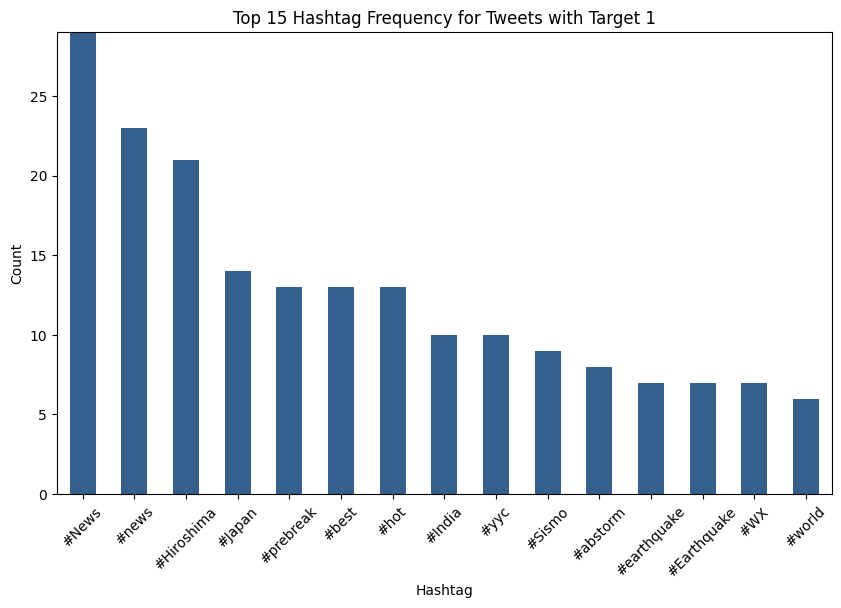

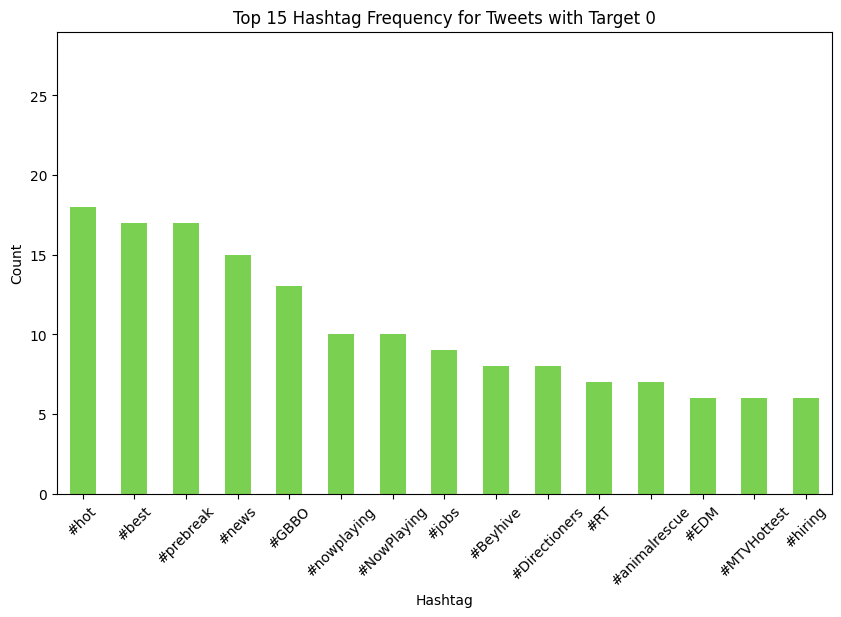

In [48]:
# Convert the Counters to pandas Series
hashtags_target1 = pd.Series(counter_1)
hashtags_target0 = pd.Series(counter_0)

# Exclude the lone '#' token if it exists
hashtags_target1 = hashtags_target1.drop('#', errors='ignore')
hashtags_target0 = hashtags_target0.drop('#', errors='ignore')

# Sort the series and limit to the top 15 hashtags
top_hashtags_target1 = hashtags_target1.sort_values(ascending=False).head(15)
top_hashtags_target0 = hashtags_target0.sort_values(ascending=False).head(15)

# Get the maximum count value across both datasets
max_count = max(top_hashtags_target1.max(), top_hashtags_target0.max())

viridis = sns.color_palette("viridis", as_cmap=True)
color1 = viridis(0.3)  # Lighter Viridis shade
color2 = viridis(0.8)  # Darker Viridis shade

# Plot for tweets with target 1
plt.figure(figsize=(10, 6))
top_hashtags_target1.plot(kind='bar', color=color1)
plt.title('Top 15 Hashtag Frequency for Tweets with Target 1')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, max_count) 
plt.show()

# Plot for tweets with target 0
plt.figure(figsize=(10, 6))
top_hashtags_target0.plot(kind='bar', color=color2)
plt.title('Top 15 Hashtag Frequency for Tweets with Target 0')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, max_count) 
plt.show()

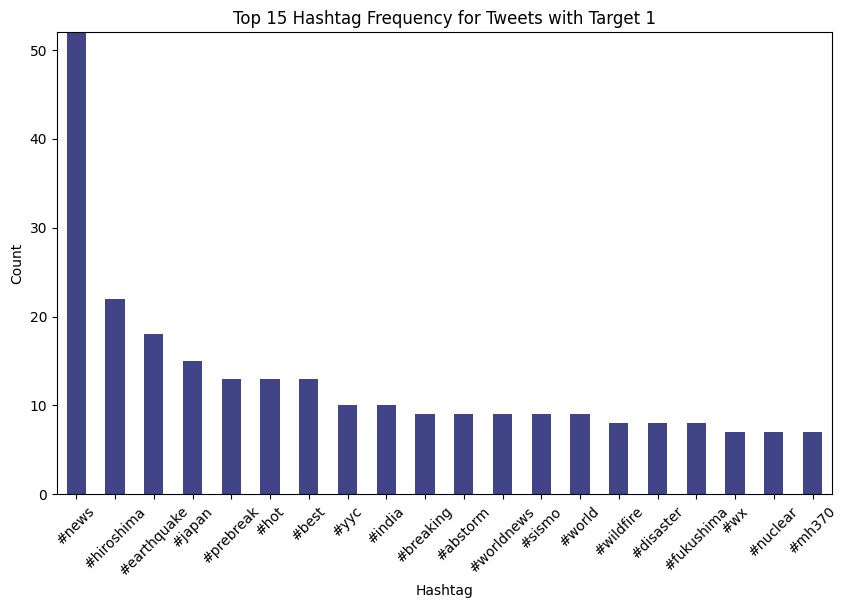

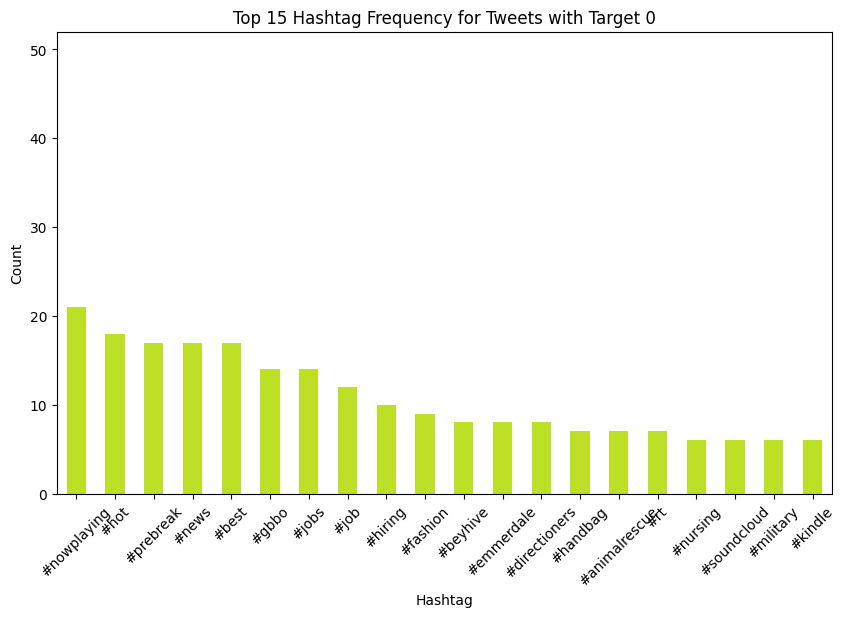

In [49]:
# Initialize counters for tweets with target 1 and target 0
counter_1 = Counter()
counter_0 = Counter()

# Loop over the 'line' column and the corresponding 'target' values
for tokens, target in zip(tweets_df['line'], tweets_df['target']):
    for token in tokens:
        # Process tokens that start with '#' but are not just a lone '#'
        if token.startswith('#') and token != '#':
            # Convert to lowercase to combine case variants (e.g., "#Python" and "#python")
            normalized_token = token.lower()
            if target == 1:
                counter_1[normalized_token] += 1
            elif target == 0:
                counter_0[normalized_token] += 1

# Convert the counters to pandas Series for plotting
hashtags_target1 = pd.Series(counter_1)
hashtags_target0 = pd.Series(counter_0)

# Sort each Series by count and select the top 15 hashtags
top_hashtags_target1 = hashtags_target1.sort_values(ascending=False).head(20)
top_hashtags_target0 = hashtags_target0.sort_values(ascending=False).head(20)

# Get the maximum count value across both datasets
max_count = max(top_hashtags_target1.max(), top_hashtags_target0.max())

# Define two distinct colors from the Viridis colormap (different from previous selection)
viridis = sns.color_palette("viridis", as_cmap=True)
color1 = viridis(0.2)  # A lighter Viridis color
color2 = viridis(0.9)  # A deeper Viridis color

# Plot for tweets with target 1
plt.figure(figsize=(10, 6))
top_hashtags_target1.plot(kind='bar', color=color1)
plt.title('Top 15 Hashtag Frequency for Tweets with Target 1')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, max_count) 
plt.show()

# Plot for tweets with target 0
plt.figure(figsize=(10, 6))
top_hashtags_target0.plot(kind='bar', color=color2)
plt.title('Top 15 Hashtag Frequency for Tweets with Target 0')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, max_count) 
plt.show()



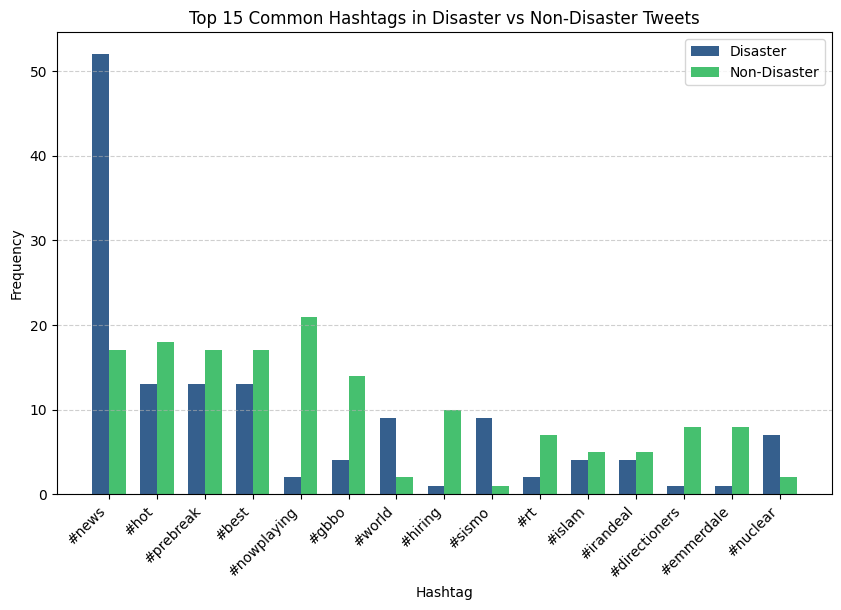

In [50]:

# Assuming counter_1 and counter_0 are already defined
hashtags_target1 = pd.Series(counter_1)
hashtags_target0 = pd.Series(counter_0)

# Find common hashtags
common_hashtags = hashtags_target1.index.intersection(hashtags_target0.index)

# Create DataFrame
common_df = pd.DataFrame({
    'Disaster': hashtags_target1.loc[common_hashtags],
    'Non-Disaster': hashtags_target0.loc[common_hashtags]
})

# Sort by total frequency and keep top 15
common_df['Total'] = common_df['Disaster'] + common_df['Non-Disaster']
common_df = common_df.sort_values(by='Total', ascending=False).head(15)

# Setup
x = np.arange(len(common_df))  # label locations
width = 0.35  # width of the bars

viridis = sns.color_palette("viridis", 256)
color_disaster = viridis[76]    # bluish
color_non_disaster = viridis[180]  # greenish

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width/2, common_df['Disaster'], width, label='Disaster', color=color_disaster)
ax.bar(x + width/2, common_df['Non-Disaster'], width, label='Non-Disaster', color=color_non_disaster)

ax.set_xlabel('Hashtag')
ax.set_ylabel('Frequency')
ax.set_title('Top 15 Common Hashtags in Disaster vs Non-Disaster Tweets')
ax.set_xticks(x)
ax.set_xticklabels(common_df.index, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# plt.tight_layout()
plt.show()


                target_1  target_0  total
#news                 52        17     69
#hot                  13        18     31
#prebreak             13        17     30
#best                 13        17     30
#nowplaying            2        21     23
#gbbo                  4        14     18
#world                 9         2     11
#hiring                1        10     11
#sismo                 9         1     10
#rt                    2         7      9
#islam                 4         5      9
#irandeal              4         5      9
#directioners          1         8      9
#emmerdale             1         8      9
#nuclear               7         2      9
#tcot                  4         4      8
#nursing               2         6      8
#handbag               1         7      8
#business              3         4      7
#seattle               2         5      7
#mtvhottest            1         6      7
#us                    4         3      7
#usa                   4         2

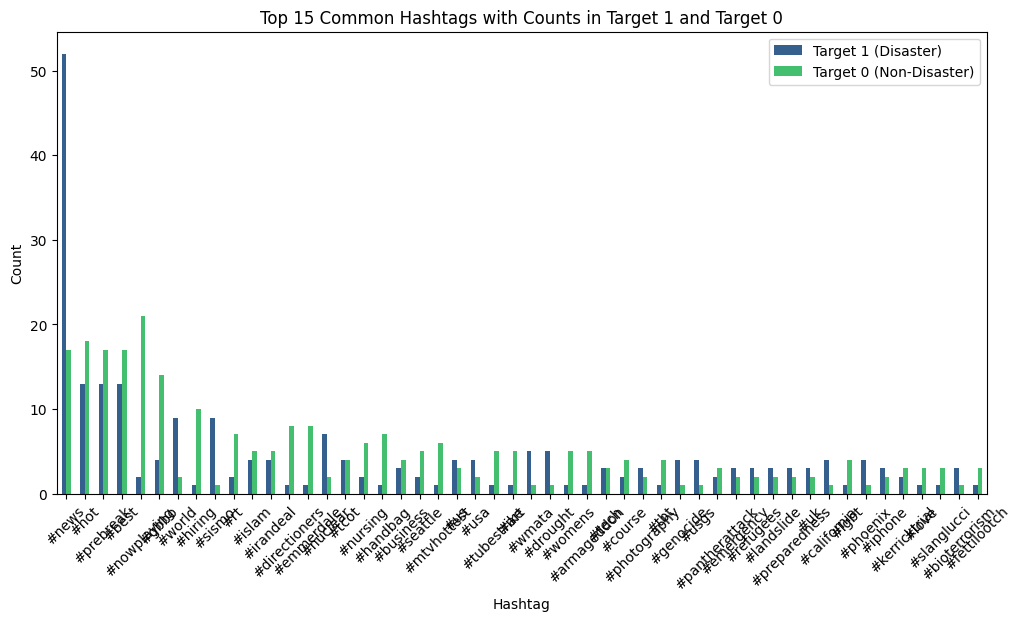

In [51]:
# Convert the Counters to pandas Series (assuming counter_1 and counter_0 are defined)
hashtags_target1 = pd.Series(counter_1)
hashtags_target0 = pd.Series(counter_0)

# Find hashtags common to both target groups
common_hashtags = hashtags_target1.index.intersection(hashtags_target0.index)

# Create a DataFrame with counts from both targets for these common hashtags
common_df = pd.DataFrame({
    'target_1': hashtags_target1.loc[common_hashtags],
    'target_0': hashtags_target0.loc[common_hashtags]
})

# Optionally, sort by the total count (sum of both targets) and select the top 15
common_df['total'] = common_df['target_1'] + common_df['target_0']
common_df = common_df.sort_values(by='total', ascending=False).head(50)

# Display the DataFrame
print(common_df)

viridis = sns.color_palette("viridis", as_cmap=True)
color1 = viridis(0.3)  # Lighter Viridis color for target_1
color2 = viridis(0.7)  # Darker Viridis color for target_0

# Plot the results as a grouped bar chart
common_df[['target_1', 'target_0']].plot(kind='bar', figsize=(12, 6), color=[color1, color2])

plt.title('Top 15 Common Hashtags with Counts in Target 1 and Target 0')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(['Target 1 (Disaster)', 'Target 0 (Non-Disaster)'])

plt.show()

In [52]:
# Check if "#nowplaying" is in the target 1 hashtags and print its count
if '#nowplaying' in hashtags_target1.index:
    print(f"#nowplaying appears in target 1 with a count of {hashtags_target1['#nowplaying']}")
else:
    print("#nowplaying does not appear in target 1.")


#nowplaying appears in target 1 with a count of 2


Correlation Matrix:
          target_1  target_0
target_1  1.000000  0.450886
target_0  0.450886  1.000000


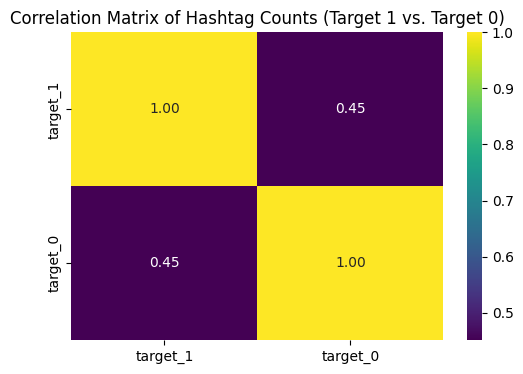

In [53]:
# Compute the correlation matrix for the counts in target 1 and target 0
corr_matrix = common_df[['target_1', 'target_0']].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Optionally, plot the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix of Hashtag Counts (Target 1 vs. Target 0)")
plt.show()


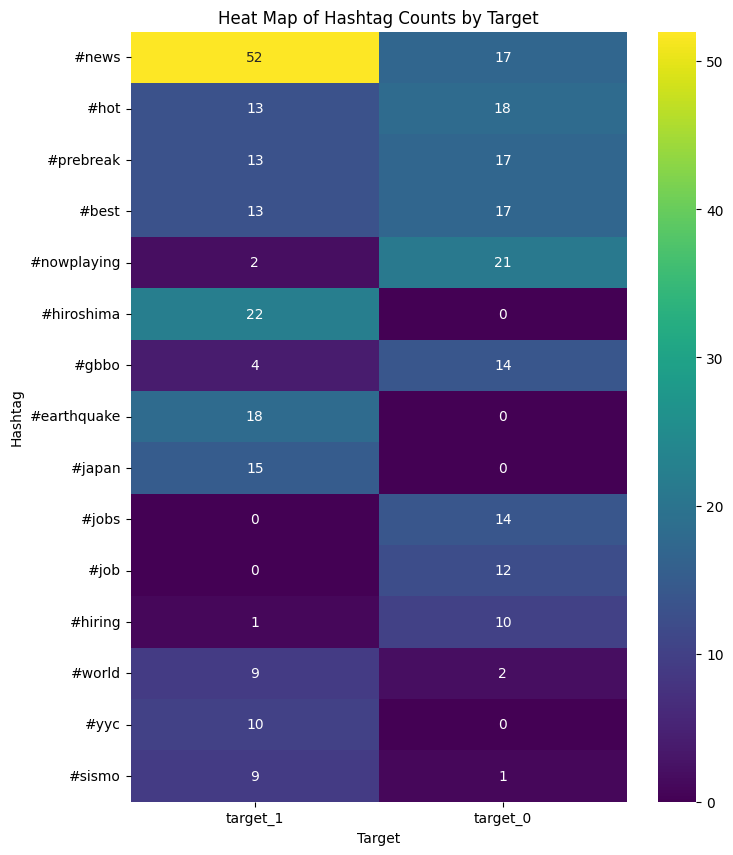

In [54]:
# Create a DataFrame from the two counters.
# Any missing counts (if a hashtag appears only in one target) are filled with 0.
df_counts = pd.DataFrame({
    'target_1': pd.Series(counter_1),
    'target_0': pd.Series(counter_0)
}).fillna(0)

# Create a total count column to sort the hashtags by overall frequency.
df_counts['total'] = df_counts['target_1'] + df_counts['target_0']

# Sort by total count and select the top 15 hashtags.
df_top15 = df_counts.sort_values('total', ascending=False).head(15)

# For the heat map, we only need the target columns.
heat_data = df_top15[['target_1', 'target_0']]

# Plot the heat map using seaborn.
plt.figure(figsize=(8, 10))
sns.heatmap(heat_data, annot=True, cmap='viridis', fmt='.0f')
plt.title('Heat Map of Hashtag Counts by Target')
plt.xlabel('Target')
plt.ylabel('Hashtag')
plt.show()


<Figure size 1000x600 with 0 Axes>

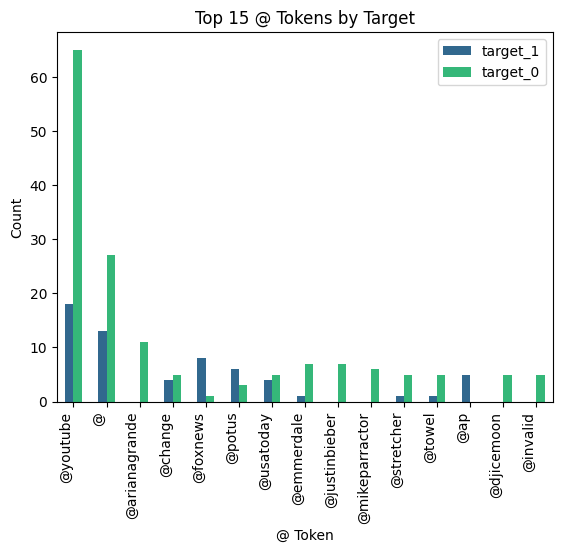

<Figure size 1000x600 with 0 Axes>

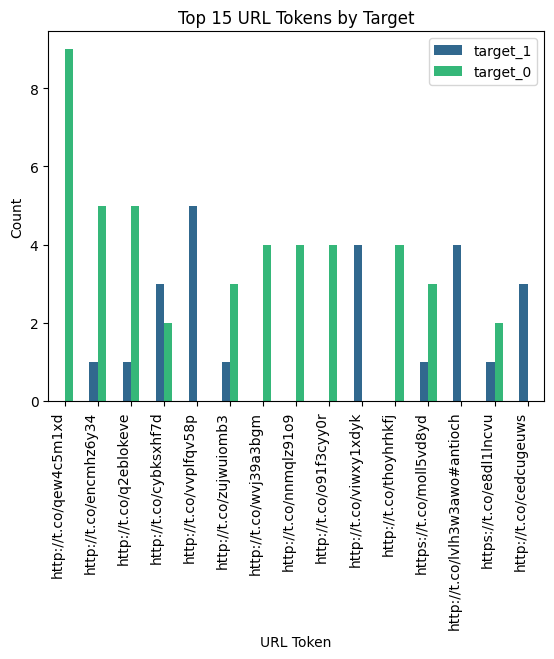

In [55]:
# Initialize counters for @ tokens and URL tokens for each target group
counter_at_1 = Counter()
counter_at_0 = Counter()
counter_url_1 = Counter()
counter_url_0 = Counter()

# Loop over the tokens in the 'line' column and the corresponding target values
for tokens, target in zip(tweets_df['line'], tweets_df['target']):
    for token in tokens:
        # Process @ tokens (mentions)
        if token.startswith('@'):
            normalized_token = token.lower()  # combine different cases
            if target == 1:
                counter_at_1[normalized_token] += 1
            elif target == 0:
                counter_at_0[normalized_token] += 1

        # Process URL tokens
        # Here we assume a URL starts with 'http://' or 'https://' or 'www.'
        if re.match(r'^(https?://|www\.)', token):
            normalized_token = token.lower()
            if target == 1:
                counter_url_1[normalized_token] += 1
            elif target == 0:
                counter_url_0[normalized_token] += 1

# Create a DataFrame for @ tokens.
df_at = pd.DataFrame({
    'target_1': pd.Series(counter_at_1),
    'target_0': pd.Series(counter_at_0)
}).fillna(0)
df_at['total'] = df_at['target_1'] + df_at['target_0']
df_at_top15 = df_at.sort_values('total', ascending=False).head(15)

# Use the Viridis color palette for plotting
colors = sns.color_palette("viridis", 2)

# Plot the @ tokens as a grouped bar chart
plt.figure(figsize=(10, 6))
df_at_top15[['target_1', 'target_0']].plot(kind='bar', color=colors)
plt.title('Top 15 @ Tokens by Target')
plt.xlabel('@ Token')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

# Create a DataFrame for URL tokens.
df_url = pd.DataFrame({
    'target_1': pd.Series(counter_url_1),
    'target_0': pd.Series(counter_url_0)
}).fillna(0)
df_url['total'] = df_url['target_1'] + df_url['target_0']
df_url_top15 = df_url.sort_values('total', ascending=False).head(15)

# Plot the URL tokens as a grouped bar chart
plt.figure(figsize=(10, 6))
df_url_top15[['target_1', 'target_0']].plot(kind='bar', color=colors)
plt.title('Top 15 URL Tokens by Target')
plt.xlabel('URL Token')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()


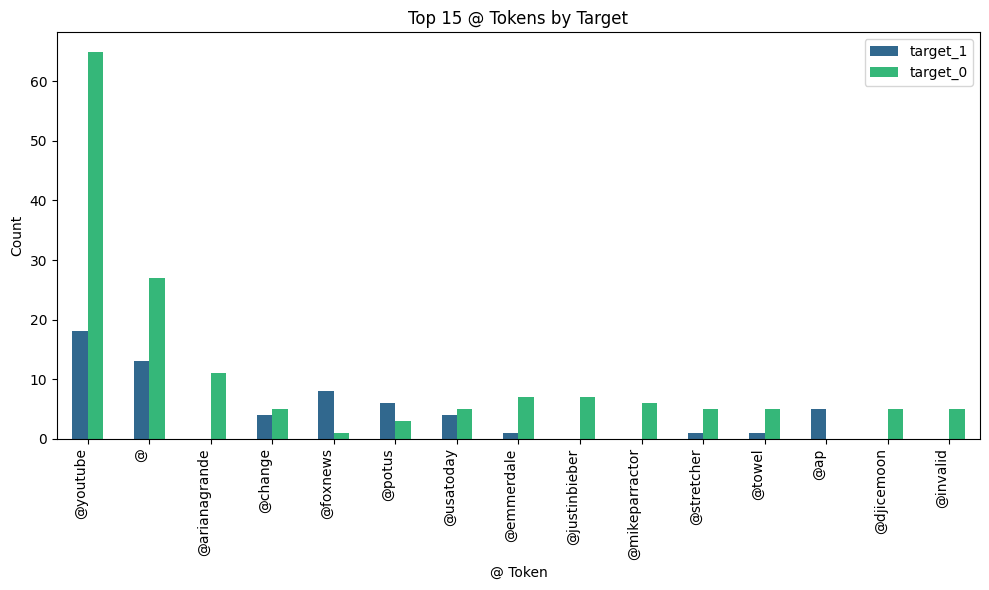

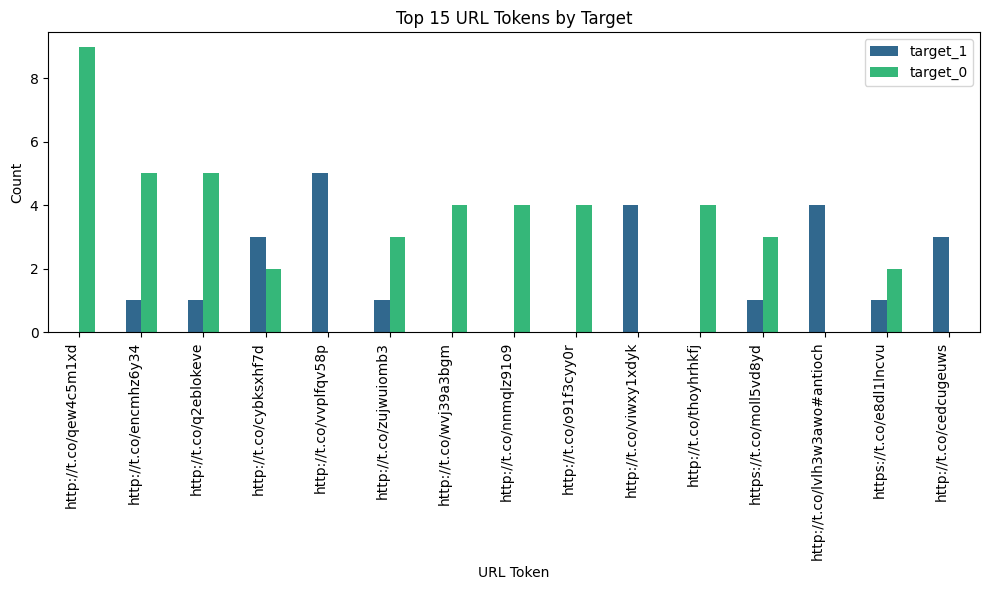

In [56]:
# For @ tokens:
ax = df_at_top15[['target_1', 'target_0']].plot(kind='bar', figsize=(10, 6), color=colors)
ax.set_xticks(range(len(df_at_top15.index)))  # Ensure ticks for each row
ax.set_xticklabels(df_at_top15.index, rotation=90, ha='right')
plt.title('Top 15 @ Tokens by Target')
plt.xlabel('@ Token')
plt.ylabel('Count')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# For URL tokens:
ax = df_url_top15[['target_1', 'target_0']].plot(kind='bar', figsize=(10, 6), color=colors)
ax.set_xticks(range(len(df_url_top15.index)))
ax.set_xticklabels(df_url_top15.index, rotation=90, ha='right')
plt.title('Top 15 URL Tokens by Target')
plt.xlabel('URL Token')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



In [57]:
def mentions_hashtags_urls(tw):
    mnt =re.compile("@\w+(?:[-']\w+)*|")
    hash =re.compile("#\w+(?:[-]\w+)*")
    urls =re.compile("http\S+")
    mention ="".join(mnt.findall(tw))
    hashtag ="".join(hash.findall(tw))
    link ="".join(urls.findall(tw))

    return mention, hashtag, link

In [58]:
tweets_df['Mentions'], tweets_df['Hashtags'],\
tweets_df['URLs'] =zip(*tweets_df['text'].\
map(mentions_hashtags_urls))

In [59]:
tweets_df

,text,target,tokens,line,Mentions,Hashtags,URLs
0,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...","[Our, Deeds, are, the, Reason, of, this, #eart...",,#earthquake,
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]","[Forest, fire, near, La, Ronge, Sask, ., Canada]",,,
2,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, shelter, in, place...","[All, residents, asked, to, ', shelter, in, pl...",,,
3,"13,000 people receive #wildfires evacuation or...",1,"[13, 000, people, receive, #wildfires, evacuat...","[13,000, people, receive, #wildfires, evacuati...",,#wildfires,
4,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...","[Just, got, sent, this, photo, from, Ruby, #Al...",,#Alaska#wildfires,
...,...,...,...,...,...,...,...
7604,#WorldNews Fallen powerlines on G:link tram: U...,1,"[#WorldNews, Fallen, powerlines, on, G, link, ...","[#WorldNews, Fallen, powerlines, on, G, :, lin...",,#WorldNews,http://t.co/EYSVvzA7Qm
7605,on the flip side I'm at Walmart and there is a...,1,"[on, the, flip, side, I'm, at, Walmart, and, t...","[on, the, flip, side, I'm, at, Walmart, and, t...",,,
7606,Suicide bomber kills 15 in Saudi security site...,1,"[Suicide, bomber, kills, 15, in, Saudi, securi...","[Suicide, bomber, kills, 15, in, Saudi, securi...",,,http://t.co/nF4IculOje
7608,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...","[Two, giant, cranes, holding, a, bridge, colla...",,,http://t.co/STfMbbZFB5


In [60]:
tweets_df.Mentions.value_counts()

Mentions
                   5525
@YouTube             60
@Change               9
@POTUS                6
@usatoday             5
                   ... 
@chriscesq            1
@charlesadler         1
@blakeshelton         1
@ijournal             1
@southridgelife       1
Name: count, Length: 1798, dtype: int64

In [61]:
extra_stopwords = [
    "get", "he", "that", "didnt", "doesnt", "dont", "isnt", "ive", "know",
    "least", "let", "like","may", "much", "must", "never", "one", "other", "rt",
    "said", "see", "seem", "she", "take", "thank", "there", "though", "still",
    "us", "use", "want", "wasnt", "way", "well", "what", "without", "wont",
    "would", "yet", "your"
]

stop_words = stopwords.words('english')
stop_words.extend(["i've"])
stop_words.extend(["your"])
stop_words.extend(["im"])
stop_words.extend(extra_stopwords)
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [62]:
porter = nltk.PorterStemmer()
porter

def tw_preprocess(tw):
    tw = tw.lower()
    tw = re.sub("@\w+(?:[-']\w+)*", "",tw)
    tw = re.sub(r"\S*\d\S*", "",tw)
    tw = re.sub("http\S+","",tw)
    tw = re.sub("[#|']","",tw)
    tokens = TweetTokenizer().tokenize(tw)
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [porter.stem(t) for t in tokens]
    tokens = [t for t in tokens if t not in string.punctuation]
    tokens = " ".join(tokens)
    return tokens

In [63]:
tweets_df["Processed_Tweet"] = tweets_df["text"].apply(tw_preprocess)

In [64]:
tweets_df

,text,target,tokens,line,Mentions,Hashtags,URLs,Processed_Tweet
0,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...","[Our, Deeds, are, the, Reason, of, this, #eart...",,#earthquake,,deed reason earthquak allah forgiv
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]","[Forest, fire, near, La, Ronge, Sask, ., Canada]",,,,forest fire near la rong sask canada
2,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, shelter, in, place...","[All, residents, asked, to, ', shelter, in, pl...",,,,resid ask shelter place notifi offic evacu she...
3,"13,000 people receive #wildfires evacuation or...",1,"[13, 000, people, receive, #wildfires, evacuat...","[13,000, people, receive, #wildfires, evacuati...",,#wildfires,,peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...","[Just, got, sent, this, photo, from, Ruby, #Al...",,#Alaska#wildfires,,got sent photo rubi alaska smoke wildfir pour ...
...,...,...,...,...,...,...,...,...
7604,#WorldNews Fallen powerlines on G:link tram: U...,1,"[#WorldNews, Fallen, powerlines, on, G, link, ...","[#WorldNews, Fallen, powerlines, on, G, :, lin...",,#WorldNews,http://t.co/EYSVvzA7Qm,worldnew fallen powerlin g link tram updat fir...
7605,on the flip side I'm at Walmart and there is a...,1,"[on, the, flip, side, I'm, at, Walmart, and, t...","[on, the, flip, side, I'm, at, Walmart, and, t...",,,,flip side walmart bomb everyon evacu stay tune...
7606,Suicide bomber kills 15 in Saudi security site...,1,"[Suicide, bomber, kills, 15, in, Saudi, securi...","[Suicide, bomber, kills, 15, in, Saudi, securi...",,,http://t.co/nF4IculOje,suicid bomber kill saudi secur site mosqu reut...
7608,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...","[Two, giant, cranes, holding, a, bridge, colla...",,,http://t.co/STfMbbZFB5,two giant crane hold bridg collaps nearbi home


In [65]:
no_features = 1000
vectoriser = CountVectorizer(min_df=2, max_features=no_features)
vectoriser

CountVectorizer(max_features=1000, min_df=2)

In [66]:
tw_vectorised = vectoriser.fit_transform(tweets_df['Processed_Tweet'])
tw_vectorised_names = vectoriser.get_feature_names_out()
tw_vectorised_names[:5]

array(['aba', 'abandon', 'abc', 'ablaz', 'absolut'], dtype=object)

In [67]:
tw_vectorised_names

array(['aba', 'abandon', 'abc', 'ablaz', 'absolut', 'accid', 'account',
       'across', 'act', 'action', 'activ', 'actual', 'ad', 'affect',
       'aftershock', 'ago', 'agre', 'ahead', 'aint', 'air', 'aircraft',
       'airplan', 'airport', 'alabama', 'alarm', 'album', 'allow',
       'almost', 'alon', 'alreadi', 'also', 'alway', 'ambul', 'america',
       'american', 'amid', 'ancient', 'angel', 'angri', 'anim', 'annihil',
       'anniversari', 'anoth', 'answer', 'anthrax', 'anyon', 'anyth',
       'apc', 'apocalyps', 'apollo', 'appear', 'area', 'arent', 'arm',
       'armageddon', 'armi', 'around', 'arrest', 'arriv', 'arson',
       'arsonist', 'art', 'articl', 'ash', 'ask', 'ass', 'atom', 'attack',
       'aug', 'august', 'australia', 'avalanch', 'avoid', 'away',
       'awesom', 'babi', 'back', 'bad', 'bag', 'ball', 'ban', 'bang',
       'bar', 'base', 'battl', 'bayelsa', 'bc', 'beach', 'beat', 'beauti',
       'becom', 'bed', 'begin', 'behind', 'believ', 'best', 'better',
       '

In [68]:
tweets_df

,text,target,tokens,line,Mentions,Hashtags,URLs,Processed_Tweet
0,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...","[Our, Deeds, are, the, Reason, of, this, #eart...",,#earthquake,,deed reason earthquak allah forgiv
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]","[Forest, fire, near, La, Ronge, Sask, ., Canada]",,,,forest fire near la rong sask canada
2,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, shelter, in, place...","[All, residents, asked, to, ', shelter, in, pl...",,,,resid ask shelter place notifi offic evacu she...
3,"13,000 people receive #wildfires evacuation or...",1,"[13, 000, people, receive, #wildfires, evacuat...","[13,000, people, receive, #wildfires, evacuati...",,#wildfires,,peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...","[Just, got, sent, this, photo, from, Ruby, #Al...",,#Alaska#wildfires,,got sent photo rubi alaska smoke wildfir pour ...
...,...,...,...,...,...,...,...,...
7604,#WorldNews Fallen powerlines on G:link tram: U...,1,"[#WorldNews, Fallen, powerlines, on, G, link, ...","[#WorldNews, Fallen, powerlines, on, G, :, lin...",,#WorldNews,http://t.co/EYSVvzA7Qm,worldnew fallen powerlin g link tram updat fir...
7605,on the flip side I'm at Walmart and there is a...,1,"[on, the, flip, side, I'm, at, Walmart, and, t...","[on, the, flip, side, I'm, at, Walmart, and, t...",,,,flip side walmart bomb everyon evacu stay tune...
7606,Suicide bomber kills 15 in Saudi security site...,1,"[Suicide, bomber, kills, 15, in, Saudi, securi...","[Suicide, bomber, kills, 15, in, Saudi, securi...",,,http://t.co/nF4IculOje,suicid bomber kill saudi secur site mosqu reut...
7608,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...","[Two, giant, cranes, holding, a, bridge, colla...",,,http://t.co/STfMbbZFB5,two giant crane hold bridg collaps nearbi home


C:\Users\Sharon\AppData\Local\Temp\ipykernel_33648\2741992577.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_counts.head(top_n), x='word', y='count', palette="viridis")


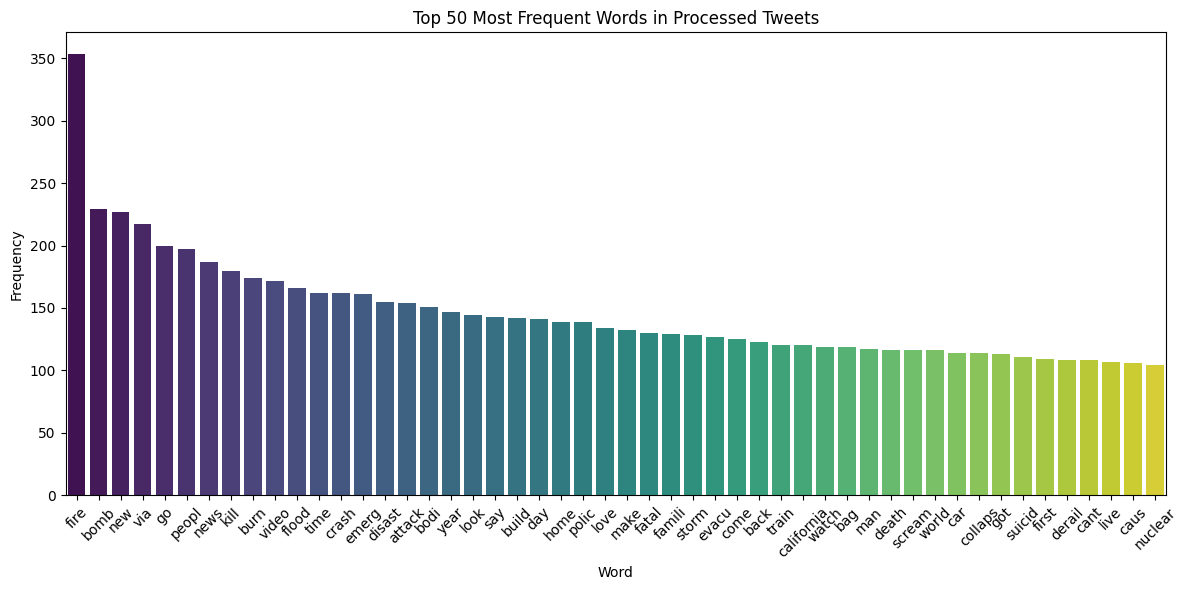

In [69]:
# Sum the word counts across all tweets (each column represents a word)
# .A1 converts the sparse matrix sum to a 1-D numpy array
word_counts = np.array(tw_vectorised.sum(axis=0)).flatten()

# Get the feature names (the vectorized words)
words = vectoriser.get_feature_names_out()

# Create a DataFrame with words and their counts
df_word_counts = pd.DataFrame({'word': words, 'count': word_counts})

# Sort the DataFrame by count in descending order
df_word_counts = df_word_counts.sort_values(by='count', ascending=False)

# Visualize the top 20 most frequent words
top_n = 50
plt.figure(figsize=(12, 6))
sns.barplot(data=df_word_counts.head(top_n), x='word', y='count', palette="viridis")
plt.title(f"Top {top_n} Most Frequent Words in Processed Tweets")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Top_50_Words.png")
plt.show()


<Figure size 2400x800 with 0 Axes>

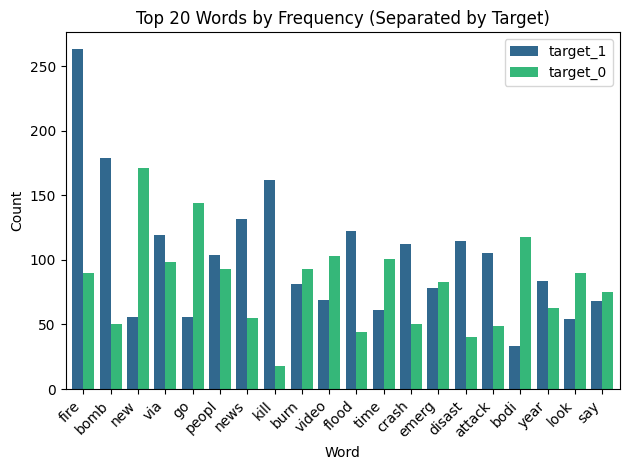

In [70]:
# Create boolean masks for target 1 and target 0 tweets
mask_1 = tweets_df['target'].to_numpy() == 1
mask_0 = tweets_df['target'].to_numpy() == 0

# Sum the word counts over tweets for each target group.
# The result is a 1 x n_words sparse matrix; convert it to a 1D numpy array.
word_counts_target1 = np.array(tw_vectorised[mask_1].sum(axis=0)).flatten()
word_counts_target0 = np.array(tw_vectorised[mask_0].sum(axis=0)).flatten()

# Get the feature names (words) from the vectoriser.
words = vectoriser.get_feature_names_out()

# Build a DataFrame with counts per word for each target.
df_word_counts = pd.DataFrame({
    'word': words,
    'target_1': word_counts_target1,
    'target_0': word_counts_target0
})

# Optionally, compute the total frequency across both targets and sort by it.
df_word_counts['total'] = df_word_counts['target_1'] + df_word_counts['target_0']
df_word_counts = df_word_counts.sort_values(by='total', ascending=False)

# Let's say we want to visualize the top 20 words.
top_n = 20
df_top = df_word_counts.head(top_n)

# Set the word column as the index for plotting.
df_top = df_top.set_index('word')

# Create a grouped bar chart comparing counts for target 1 and target 0.
plt.figure(figsize=(24, 8))
ax = df_top[['target_1', 'target_0']].plot(kind='bar', width=0.8, color=colors)
ax.set_title("Top 20 Words by Frequency (Separated by Target)")
ax.set_xlabel("Word")
ax.set_ylabel("Count")
ax.set_xticklabels(df_top.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [71]:
df_word_counts.head(20)

,word,target_1,target_0,total
335,fire,263,90,353
121,bomb,179,50,229
601,new,56,171,227
936,via,119,98,217
377,go,56,144,200
656,peopl,104,93,197
602,news,132,55,187
483,kill,162,18,180
134,burn,81,93,174
938,video,69,103,172
